# Haar Cascades

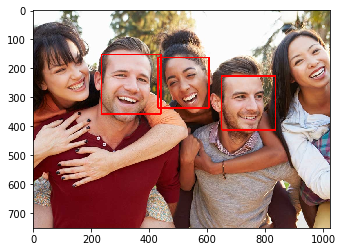

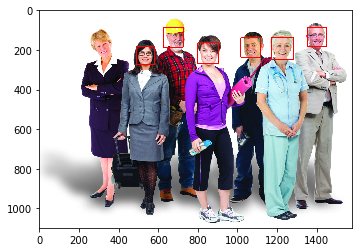

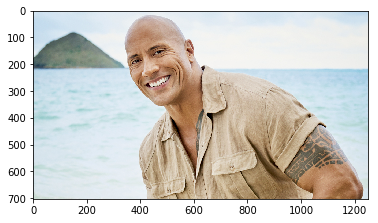

In [128]:
import cv2, os
import matplotlib.pyplot as plt


imgFolderPath = './imgs/'
cascadePath = './haarcascade_frontalface_default.xml'
imagePaths = []

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascadePath)

# Reading images
for filename in os.listdir(imgFolderPath):
    imagePaths.append(imgFolderPath+filename)

for imgPath in imagePaths:
    # Read the image
    img = cv2.imread(imgPath)

    # Grayscale the image
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        img_gray,
        scaleFactor=1.1351,
        minNeighbors=5,
        minSize=(80, 80)
    )
    # Draw boxes around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


The resuts are not that great (compared to today's SOTA), let's try somthing else!!

# Deep Neural Network with the help of TensorFlow

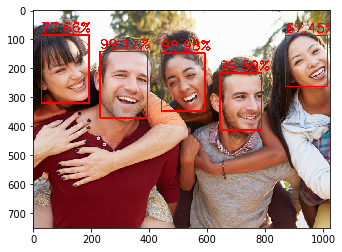

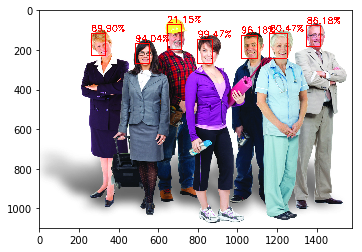

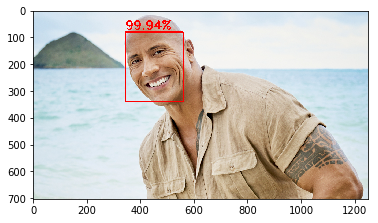

In [145]:
import numpy as np

modelFile = "opencv_face_detector_uint8.pb"
configFile = "opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile) 

        
for imgPath in imagePaths:
    # Read the image
    img = cv2.imread(imgPath)
    
    img_pixel_mean = np.mean(img, axis=(0, 1))
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (400, 400)), 1.1, (400, 400),img_pixel_mean)

    #  x1           x2
    #   ______________
    #  |              | y1
    #  |              |
    #  |              | 
    #  |              |
    #  |              |
    #  |______________| y2
    
    net.setInput(blob)
    detections = net.forward()
    
    (h, w) = img.shape[:2]
    
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        
        if confidence > 0.2:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")
 
            text = "{:.2f}%".format(confidence * 100)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 3)
            cv2.putText(img, text, (x1, y1-10),
            cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0,255), 4)
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()